# Animation

As cellular automata are dynamic objects, it can be helpful to display them as animations. matplotlib provides us with the tools to create animations.

Let's start by loading in our small simulation from before:

In [1]:
import numpy as np

with np.load("infection_simulation.npz") as f:
    cells = f["state"]

We start the same way as before, by calling `imshow`, but this time we pass in the argument `animated=True`. It's not strictly needed but for larger animations it makes them generate more quickly.

The main difference here is that since we want to display our data one row at a time,  we only pass in `cells[0]` at first. That's a one-dimensional object so we wrap it in a list with `[cells[0]]` to make it two-dimensional:

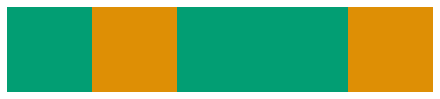

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the initial figure and axes
fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

cmap = ListedColormap(["#029e73", "#de8f05"])

# Plot the initial grid
array_plot = ax.imshow(
    [cells[0]],  # Make our data 2-D
    vmin=cells.min(),
    vmax=cells.max(),
    animated=True,
    cmap=cmap
)

To define the animation, we create a function which will be called for each frame of the animation. It takes a single argument of the current frame number, and uses that to get the appropriate data out of `cells` (again using the extra square brackets since our data in this case is one-dimensional) and overwrite the data in the plot with `array_plot.set_array`:

In [3]:
def animate(i):
    array_plot.set_array([cells[i]])
    return [array_plot]

Now that's all set up, we can use the [class `FuncAnimation`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) to set everything up.

Jupyter Notebooks know how to display these animations and give us some controls to move through them:

In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create an animation object which:
# - animate the Figure, `fig`
# - using the function `animate`
# - for len(cells) number of frames
# - where each frame lasts 100 milliseconds
anim = FuncAnimation(fig, animate, frames=len(cells), interval=100)

# Display the animation in the notebook
HTML(anim.to_jshtml())

For understanding one-dimensional cellular automata, an animation may not be better than the overview `imshow` we saw in the last chapter, but if you had a two-dimensional cellular automaton then an animation like this would be the only way to see what's going on.